# Hairsalon  Database


## About this notebook

This notebook was created to help with the initial analysis of the hair salon database.


In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import workdays as wd  #packahe used to calculate diff business days
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
import sqlite3 as sql3
db=sql3.connect(DB_FILE)

In [3]:
##############################################################################
##########                DATABASE FUNCTIONS                     #############
##############################################################################

#### List the name of the tables on the database 
def listTables():
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    cur = db.cursor()
    cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
    res = cur.fetchall()
    cur.close()
    db.close()
    return(res)

#### Read function to import data from the SQL to a pandas dataframe.
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

#### Write a pandas dataframe into an SQL table. Use overwrite=True if you want to delete 
#### first a pre-existent table with the same name. Use append=True if you want to append
#### the data in the dataframe to a pre-existent table.
def writeSQL(df,tablename,overwrite=False, append=False):
    import pandas as pd
    import sqlite3 as sql
    db = sql.connect(DB_FILE)
    if (overwrite):
        action = "replace"
    elif (append):
        action = "append"
    else: 
        action = "fail"
    df.to_sql(tablename, db, if_exists=action)
    db.close()

#### Generate a view based on the provided SQL query
def createView(viewname, vquery):
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    query="""SELECT * FROM sqlite_master WHERE type='view'"""
    listview=readSQL(query)
    df=listview[listview['name']==viewname]
    if len(df)==1:
        query='drop view {}'.format(viewname)
        execquery(query)
    view = 'CREATE VIEW {} AS {}'.format(viewname,vquery)
    cur = db.cursor()
    cur.execute(view)
    cur.close()
    db.close()

def execquery (query):
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    cur = db.cursor()
    cur.execute(query)
    cur.close()
    db.close()
     

<h1> import from csv data into sqltables to run once recreates all tables </h1>

In [174]:
import pandas as pd
file_tuple=("Client Cancellations0","Future Bookings (All Clients)0","No-Show Report0",
            "Product Listing (Retail)0","Receipt Transactions0","Service Listing0")
table_tuple=("cancellation","futurebooking","noshow","product","receipt","service")
tableiter=iter(table_tuple)

#loop over csv files and crate a correpsonding table for each file 
for f in file_tuple:
    file=f'{DATA_PATH}/{f}.csv'
    df=pd.read_csv(file)
    #rename columns remove spaces and lower allcharacters
    df.rename(columns=lambda x:x.replace(" ",""),inplace=True)
    df.rename(columns=lambda x:x.lower(),inplace=True)
    df.to_sql(next(tableiter),db,if_exists='replace',index=False)

In [175]:
db.commit()

In [176]:
cancellations = readSQL('''SELECT * FROM cancellation''')
cancellations.head()

,canceldate,code,service,staff,bookingdate,canceledby,days
0,05/22/2018,MASA01,CFC,JOANNE,05/24/2018,ADMIN,2.0
1,06/27/2018,MASA01,CBAL,KELLY,06/27/2018,ADMIN,0.0
2,07/03/2018,MASA01,SHCM,BECKY,07/10/2018,BECKY,7.0
3,07/10/2018,MASA01,SHCC,JJ,07/11/2018,KELLY,1.0
4,07/24/2018,TRUA01,SHCM,KELLY,07/24/2018,TANYA,0.0


In [177]:
futurebookings=readSQL('''SELECT * FROM futurebooking''')
futurebookings.head()

,code,staff,service,date,time,timeint
0,JUNJ01,JJ,CON,03/14/2018,3:50:00 PM,950
1,NORJ01,JJ,SHCM,03/14/2018,4:00:00 PM,960
2,CORS01,JJ,SHCW,03/15/2018,2:10:00 PM,850
3,KERT01,JJ,SHCW,03/15/2018,10:00:00 AM,600
4,LEHJ01,JJ,SHCM,03/15/2018,6:00:00 PM,1080


In [178]:
receipts=readSQL('''SELECT * FROM receipt''')
receipts.head()

,receipt,date,description,client,staff,quantity,amount,gst,pst
0,10,03/15/2018,Women's hair cut,KERT01,JJ,1,82.0,4.10,6.56
1,100,04/05/2018,Women's hair cut,COOM01,SINEAD,1,70.0,3.50,5.60
2,1000,06/09/2018,Consultation,PEDM01,JJ,1,0.0,0.00,0.00
3,1001,06/09/2018,Women's hair cut,BAIS01,KELLY,1,55.0,2.75,4.40
4,1003,06/09/2018,Women's hair cut,FRAL01,KELLY,1,65.0,3.25,5.20


In [179]:
noshows=readSQL('''SELECT * FROM noshow''')
noshows.head()

,date,code,service,staff
0,04/13/2018,None,SHCW,JJ
1,07/27/2018,AMAB01,SHCM,KELLY
2,06/07/2018,APPS01,SBD,KELLY
3,06/05/2018,ASIS01,SHCW,KELLY
4,05/31/2018,BISD01,CON,SINEAD


In [180]:
products=readSQL('''SELECT * FROM product''')
products.head()

,isactive,code,description,supplier,brand,category,price,onhand,minimum,maximum,cost,cog,ytd,package
0,1,AGBALANCE335M,AG balance 355ml,VENUS,AG,RETAIL,30.0,2,2,2,0.0,0.0,27.0,0
1,1,AGBOOST355ML,AG Boost 355ml,VENUS,AG,RETAIL,30.0,3,2,2,18.0,54.0,0.0,0
2,1,AGCLOUD107ML,AG Cloud 107ml,VENUS,AG,RETAIL,26.0,4,2,2,15.6,62.4,23.4,0
3,1,AGDRYLIFT44ML,AG Dry Lift 44ml,VENUS,AG,RETAIL,24.0,1,2,2,14.4,14.4,43.2,0
4,1,AGREMEDY148ML,AG Remedy 148ml,VENUS,AG,RETAIL,26.0,3,2,2,15.6,46.8,0.0,0


In [181]:
services=readSQL('''SELECT * FROM service''')
services.head()

,isactive,code,desc,cate,price,cost
0,1,CAL,accent lights,COLOR,0,10
1,1,CALC,Accent lights and color,COLOR,0,10
2,1,CAS,Color additional service,COLOR,0,10
3,1,CBAL,Balayage,COLOR,0,10
4,1,CCAMO,Men's camo color,COLOR,45,5


In [182]:
#SQLITE DB date and time are saved as text values - the code below updates the format in the DB
#converts format date MM/DD/YYYY =>ISO FORMAT 8601 YYYY-DD-MM
#converts format date 3:50:0 PM =>ISO FORMAT HH:MM:SS
import datetime as dt
cancellations['canceldate']=pd.to_datetime(cancellations['canceldate'],format="%m/%d/%Y")
cancellations['canceldate'] = cancellations['canceldate'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
cancellations['bookingdate']=pd.to_datetime(cancellations['bookingdate'],format="%m/%d/%Y")
cancellations['bookingdate'] = cancellations['bookingdate'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
cancellations.to_sql('cancellation',db,if_exists='replace',index=False)

futurebookings['date']=pd.to_datetime(futurebookings['date'],format="%m/%d/%Y")
futurebookings['date'] = futurebookings['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
futurebookings['time']=pd.to_datetime(futurebookings['time'],infer_datetime_format=True)
futurebookings['time'] = futurebookings['time'].apply(lambda x: dt.datetime.strftime(x, '%H:%M:%S'))
futurebookings.to_sql('futurebooking',db,if_exists='replace',index=False)

receipts['date']=pd.to_datetime(receipts['date'],format="%m/%d/%Y")
receipts['date'] = receipts['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
receipts.to_sql('receipt',db,if_exists='replace',index=False)

#converts format date MM/DD/YY =>ISO FORMAT 8601 YYYY-DD-MM
noshows['date']=pd.to_datetime(noshows['date'],format="%m/%d/%Y")
noshows['date'] = noshows['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
noshows.to_sql('noshow',db,if_exists='replace',index=False)

In [40]:
query = """SELECT MIN(canceldate), MAX(canceldate), MIN(bookingdate), Max (bookingdate),min(days),max(days),count(*)
         FROM cancellation"""
resquery = readSQL(query)
resquery

,MIN(canceldate),MAX(canceldate),MIN(bookingdate),Max (bookingdate),min(days),max(days),count(*)
0,2018-03-27,2018-07-28,2018-03-29,2018-09-21,-37.0,66.0,243


In [41]:
query = """SELECT MIN(date), MAX(date), count(*)
         FROM noshow"""
resquery = readSQL(query)
resquery

,MIN(date),MAX(date),count(*)
0,2018-03-14,2018-07-29,60


In [3]:
query = """SELECT MIN(date), MAX(date), Min(Time),Max(time), count(*)
         FROM futurebooking"""
resquery = readSQL(query)
resquery

,MIN(date),MAX(date),Min(Time),Max(time),count(*)
0,2018-03-14,2019-02-15,08:00:00,19:30:00,1906


In [43]:
query = """SELECT MIN(date), MAX(date),MIN(amount),MAX(amount), count(*)
         FROM receipt """
resquery = readSQL(query)
resquery

,MIN(date),MAX(date),MIN(amount),MAX(amount),count(*)
0,2018-03-15,2018-07-29,-52.0,300.0,1934


In [44]:
#A receipt can count several sub-receipts for different services or products
query = """SELECT count(*), count(distinct receipt) 
         FROM receipt """
resquery = readSQL(query)
resquery

,count(*),count(distinct receipt)
0,1934,1436


In [4]:
#nb of sub-receipts vary from one to six
query = """
SELECT count(*) receipts, subreceiptcnt nbsubreceipts FROM
(SELECT count(*) subreceiptcnt, receipt 
         FROM receipt group by receipt)
group by subreceiptcnt"""
resquery = readSQL(query)
resquery

,receipts,nbsubreceipts
0,1047,1
1,309,2
2,57,3
3,18,4
4,4,5
5,1,6


In [48]:
#All services listed in futurebooking are services defined in service table [same number of rows]
query= """select count(*) from futurebooking fb
        inner join service s on fb.service=s.code"""
resquery = readSQL(query)
resquery

,count(*)
0,1906


In [189]:
#part of the receipts are for services
query= """select count(*) from receipt r
        inner join service s on r.description=s.desc
        WHERE r.description is NOT NULL
        """
resquery = readSQL(query)
resquery

,count(*)
0,1758


In [190]:
#part of the receipts are for products
query= """select count(*) from receipt r
        inner join product p on r.description=p.description WHERE r.description is NOT NULL"""
resquery = readSQL(query)
resquery

,count(*)
0,173


In [191]:
#part of the receipts are not indicated with services or services
query= """select count(*) from receipt r 
        left join product p on r.description=p.description 
        left join service s on r.description=s.desc
        where p.description is NULL and s.desc is NULL"""
resquery = readSQL(query)
resquery

,count(*)
0,3


In [92]:
query="""select fb.*, s.desc description, s.cate category from futurebooking fb 
inner join service s on fb.service=s.code """
createView('vfb',query)

In [204]:
#noshows  linked to a booking
query="""select n.* from noshow n
    inner join futurebooking fb  
    on n.date=fb.date and n.code=fb.code and n.service=fb.service and n.staff=fb.staff"""
resquery=readSQL(query)
resquery.shape

(59, 4)

In [205]:
#noshows that are not  linked apparently not linked directly to a booking #we must keep it for missing handling
query="""select n.* from noshow n
    left join futurebooking fb  
    on n.date=fb.date and n.code=fb.code and n.service=fb.service and n.staff=fb.staff
    where fb.date is null or fb.code is null or fb.service is null or fb.staff is null"""
resquery=readSQL(query)
resquery.head()

,date,code,service,staff
0,2018-04-13,None,SHCW,JJ


In [268]:
#there is a missing customer we will need to check this row
query="""select * from futurebooking fb  
    where fb.date='2018-04-13' and fb.service='SHCW' and fb.staff='JJ' """
resquery=readSQL(query)
resquery

,code,staff,service,date,time,timeint
0,None,JJ,SHCW,2018-04-13,18:00:00,1080
1,ALLM01,JJ,SHCW,2018-04-13,11:50:00,710
2,MOLA01,JJ,SHCW,2018-04-13,16:20:00,980
3,ROSL01,JJ,SHCW,2018-04-13,14:00:00,840


#Verifying that there is not twice the same appointment by the same person on the same day for the same service 

In [212]:
query="""select count(*), fb.date,fb.code,fb.service,fb.staff from futurebooking fb 
      group by fb.date,fb.code,fb.service,fb.staff
      having count(*)>1"""
resquery=readSQL(query)
resquery.head()

,count(*),date,code,service,staff


Appointments were cancelled and booked on the same day by a customer 
A diffferent staff was assgined or maybe different service 
we might not take them into account as late cancellation
We need to understand the cause we will further investigate 
some appointments for the same person were cancelled twice or even 4 times !

In [50]:
query="""select fb.code, fb.staff,fb.service, fb.date from futurebooking fb inner join cancellation c
where fb.date=c.bookingdate and fb.code=c.code """
resquery=readSQL(query)
resquery.head()

,code,staff,service,date
0,SARA01,JJ,SHCM,2018-04-04
1,HUDM01,JJ,CHLFH,2018-04-08
2,STEM01,BECKY,SHCW,2018-04-21
3,BUSM01,SINEAD,SHCW,2018-04-26
4,MOIB01,SINEAD,SHCW,2018-04-26


In [197]:
#All services defined in table cancellation are defined in table services
query="""select  count(*) from vcancellation c where description is NULL"""
resquery=readSQL(query)
resquery

,count(*)
0,0


In [96]:
#query="""drop view vcancellation"""
#execquery(query)
query="""select c.*, s.desc description, s.cate category from cancellation c 
inner join service s on c.service=s.code """
createView('vcancellation',query)

In [97]:
#All services defined in table futurebookings are defined in table services
query="""select  count(*) from vfb c where description is NULL"""
resquery=readSQL(query)
resquery

,count(*)
0,0


In [70]:
#create extended view of receipt 
query="""select r.*,s.code service, 'S' type, s.cate category 
            from receipt r inner join service s on r.description=s.desc
union all
            select r.*,p.code service, 'P' type, p.category category 
            from receipt r inner join product p on r.description=p.description
union all
            select r.*, NULL service, NULL type, NULL category
            from receipt r
            left join service s on r.description=s.desc
            left join product p on r.description=p.description 
            where s.desc IS NULL and p.description IS NULL """
createView('vreceipt',query)
resquery=readSQL("""select * from vreceipt """)
resquery.head()

,receipt,date,description,client,staff,quantity,amount,gst,pst,service,type,category
0,10,2018-03-15,Women's hair cut,KERT01,JJ,1,82.0,4.10,6.56,SHCW,S,STYLE
1,100,2018-04-05,Women's hair cut,COOM01,SINEAD,1,70.0,3.50,5.60,SHCW,S,STYLE
2,1000,2018-06-09,Consultation,PEDM01,JJ,1,0.0,0.00,0.00,CON,S,MISC
3,1001,2018-06-09,Women's hair cut,BAIS01,KELLY,1,55.0,2.75,4.40,SHCW,S,STYLE
4,1003,2018-06-09,Women's hair cut,FRAL01,KELLY,1,65.0,3.25,5.20,SHCW,S,STYLE


In [11]:
cancellation=readSQL("""select * from cancellation""")
print('cancellation', len(cancellation))
futurebooking=readSQL("""select * from futurebooking""")
print('futurebooking',len(futurebooking))
noshow=readSQL("""select * from noshow""")
print('noshow',len(noshow))
receipt=readSQL("""select * from receipt""")
receipt.head()
print('receipt',len(receipt))

cancellation 243
futurebooking 1906
noshow 60
receipt 1934


In [12]:
query="""select * from vfb"""
vfb=readSQL(query)
vfb.shape

(1906, 8)

In [13]:
vfb.rename(columns={'code':'client'},inplace=True)
print('vfb', len(vfb))
vfb.columns

vfb 1906


Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category'],
      dtype='object')

In [14]:
vcancellation=readSQL("""select * from vcancellation""")
print('vcancellation', len(vcancellation))
vcancellation.columns

vcancellation 243


Index(['canceldate', 'code', 'service', 'staff', 'bookingdate', 'canceledby',
       'days', 'description', 'category'],
      dtype='object')

In [15]:
vcancellation.rename(columns={'bookingdate':'date','code':'client'},inplace=True)
vcancellation.columns

Index(['canceldate', 'client', 'service', 'staff', 'date', 'canceledby',
       'days', 'description', 'category'],
      dtype='object')

In [16]:
vreceipt=readSQL("""select * from vreceipt """)
len(vreceipt)

1934

In [17]:
vreceipt.columns

Index(['receipt', 'date', 'description', 'client', 'staff', 'quantity',
       'amount', 'gst', 'pst', 'service', 'type', 'category'],
      dtype='object')

In [18]:
noshow.rename(columns={'code':'client'},inplace=True)
noshow.columns

Index(['date', 'client', 'service', 'staff'], dtype='object')

<h3>missing values analysis

In [19]:
vcancellation.isna().sum()

canceldate     0
client         0
service        0
staff          0
date           0
canceledby     0
days           2
description    0
category       0
dtype: int64

In [20]:
#future booking and past non cancelled bookings
vfb.isna().sum()

client         1
staff          0
service        0
date           0
time           0
timeint        0
description    0
category       0
dtype: int64

In [21]:
noshow.isna().sum()

date       0
client     1
service    0
staff      0
dtype: int64

In [22]:
receipt.isna().sum()

receipt        0
date           0
description    3
client         0
staff          0
quantity       0
amount         0
gst            0
pst            0
dtype: int64

In [23]:
vreceipt.isna().sum()

receipt        0
date           0
description    3
client         0
staff          0
quantity       0
amount         0
gst            0
pst            0
service        3
type           3
category       9
dtype: int64

<h2> building final data set 

building data set of future and non cancelled bookings it includes no shows

We will suppress all bookings that occur after 2018-07-29. No receipts are produced after this date (see MAX receipt date) Therefore we have no way of understanding what happened after this date

In [24]:
query="""select vfb.code client,vfb.staff,vfb.service, vfb.date, vfb.time,vfb.timeint, 
        description, category,
        CASE 
        WHEN (vfb.date IS NULL or vfb.code IS NULL or vfb.service IS NULL or vfb.staff IS NULL) THEN NULL  
        WHEN (n.date IS NULL or n.code IS NULL or n.service IS NULL or n.staff IS NULL) THEN 0 
        ELSE 1 END as noshowflag 
        FROM vfb
        LEFT JOIN noshow n on vfb.date=n.date and vfb.code=n.code and vfb.service=n.service and vfb.staff=n.staff
        WHERE vfb.date <= '2018-07-29' or vfb.date IS NULL
        """
bookings=readSQL(query)
bookings['canceldate']=None
bookings['canceledby']=None
bookings['latecancellation']=0
bookings.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate', 'canceledby',
       'latecancellation'],
      dtype='object')

In [25]:
len(bookings[bookings['noshowflag']==1])

59

In [26]:
bookings.isna().sum()

client                 1
staff                  0
service                0
date                   0
time                   0
timeint                0
description            0
category               0
noshowflag             1
canceldate          1717
canceledby          1717
latecancellation       0
dtype: int64

<h4>building list of all cancellations including late minute cancellations

In [30]:
len(cancellations2)

243

In [34]:
cancellations2=vcancellation.copy()
cancellations2['noshowflag']=0
cancellations2['deltabdays']=None
cancellations2=cancellations2[['client','staff','service','date','description','category',
                               'noshowflag','canceldate','canceledby','deltabdays']]
cancellations2.columns

Index(['client', 'staff', 'service', 'date', 'description', 'category',
       'noshowflag', 'canceldate', 'canceledby', 'deltabdays'],
      dtype='object')

In [35]:
print('cancellation', len(cancellations2))
print('booking',len(bookings))
print('noshow',len(noshow))
print('receipt',len(receipt))

cancellation 243
booking 1717
noshow 60
receipt 1934


In [36]:
cancellations2=cancellations2[cancellations2.canceldate <= '2018-07-28']
cancellations2.isna().sum()

client           0
staff            0
service          0
date             0
description      0
category         0
noshowflag       0
canceldate       0
canceledby       0
deltabdays     243
dtype: int64

<h6>calculating difference of business days to determine late cancellations that are equivalent to noshow

In [37]:
import datetime as dt
import workdays

#salon is open on all days execpt monday
wd.weekends=(0,) 
#ontorio holidays
holidays=[dt.date(2018,3,30),dt.date(2018,5,21),dt.date(2018,7,1)]
wd.weekends
delta=[]
for row in cancellations2.itertuples():
    sd=pd.to_datetime(row.canceldate).date()
    ed=pd.to_datetime(row.date).date()
    if sd==ed:
        nbwd=0
    else:
        nbwd=wd.networkdays(sd,ed,holidays)-1
    delta.append(nbwd)
cancellations2.deltabdays=delta
cancellations2.dtypes

client         object
staff          object
service        object
date           object
description    object
category       object
noshowflag      int64
canceldate     object
canceledby     object
deltabdays      int64
dtype: object

In [38]:
cancellations2.head()

,client,staff,service,date,description,category,noshowflag,canceldate,canceledby,deltabdays
0,MASA01,JOANNE,CFC,2018-05-24,Color full color,COLOR,0,2018-05-22,ADMIN,2
1,MASA01,KELLY,CBAL,2018-06-27,Balayage,COLOR,0,2018-06-27,ADMIN,0
2,MASA01,BECKY,SHCM,2018-07-10,Men's hair cut,STYLE,0,2018-07-03,BECKY,6
3,MASA01,JJ,SHCC,2018-07-11,Children (under 12),STYLE,0,2018-07-10,KELLY,1
4,TRUA01,KELLY,SHCM,2018-07-24,Men's hair cut,STYLE,0,2018-07-24,TANYA,0


In [39]:
cancellations2.to_sql('cancellations2',db,if_exists='replace',index=False)


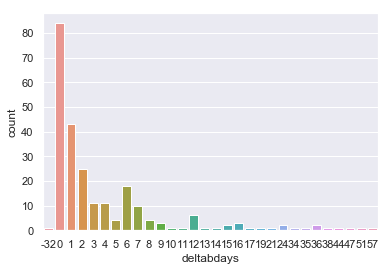

In [40]:
#indicates the number of business days between cancellation and appointment day
ax = sns.countplot(x="deltabdays", data=cancellations2)

In [26]:
cancellations2[(cancellations2.deltabdays<0)]

,client,staff,service,date,description,category,noshowflag,canceldate,canceledby,deltabdays
154,KOOM01,JJ,SHCW,2018-04-03,Women's hair cut,STYLE,0,2018-05-10,JJ,-32


In [27]:
cancellations2["latecancellation"]=0
cancellations2["noshowflag"]=0
cancellations2.loc[((cancellations2.deltabdays==0) | (cancellations2.deltabdays==1)),"latecancellation"]=1
print('total cancellations',len(cancellations2))
print('late cancellation day',len(cancellations2[(cancellations2.latecancellation==1)]))
cancellations2.loc[(cancellations2.deltabdays==0),"noshowflag"]=1
print('cancellation done one day before appointment day',len(cancellations2[(cancellations2.latecancellation==1) & (cancellations2.noshowflag==0)]))
print('cancellation done on appointment day',len(cancellations2[(cancellations2.noshowflag==1)]))
cancellations2.columns

total cancellations 243
late cancellation day 127
cancellation done one day before appointment day 43
cancellation done on appointment day 84


Index(['client', 'staff', 'service', 'date', 'description', 'category',
       'noshowflag', 'canceldate', 'canceledby', 'deltabdays',
       'latecancellation'],
      dtype='object')

In [28]:
#data frame of cancellations without no noshow includes late cancellations
cancellation3=cancellations2.copy()
cancellationearly=cancellation3[(cancellation3.latecancellation==0)]
cancellationnoshow=cancellation3[(cancellation3.noshowflag==1)]
cancellationeve=cancellation3[(cancellation3.noshowflag==0) & (cancellation3.latecancellation==1)]
len(cancellation3)

243

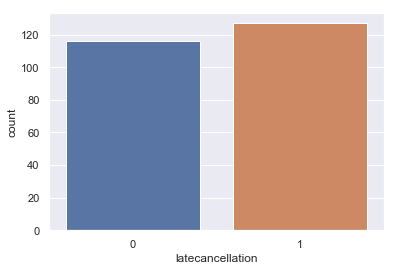

In [29]:
ax = sns.countplot(x="latecancellation", data=cancellation3)

<h6> concatenating effective bookings with cancellations done on the day  

In [30]:
print('cancellation no show',len(cancellationnoshow))
print('bookings',len(bookings))
bookings.columns

cancellation no show 84
bookings 1717


Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate', 'canceledby',
       'latecancellation'],
      dtype='object')

In [31]:
cancellationnoshow.columns

Index(['client', 'staff', 'service', 'date', 'description', 'category',
       'noshowflag', 'canceldate', 'canceledby', 'deltabdays',
       'latecancellation'],
      dtype='object')

In [32]:
fbooking2=pd.concat([bookings,cancellationnoshow.loc[:, cancellationnoshow.columns != 'deltabdays']
],sort=False)
len(fbooking)

NameError: name 'fbooking' is not defined

In [33]:
fbooking2=fbooking.copy()
fbooking2.dtypes

NameError: name 'fbooking' is not defined

In [34]:
print('total number of appointments',len(fbooking2))
print('number of pure noshows', len(fbooking2[(fbooking2.noshowflag==1) & (fbooking2.latecancellation==0)]))
print('number of cancellation on appointement day', len(fbooking2[(fbooking2.noshowflag==1) & (fbooking2.latecancellation==1)]))
print('number of non cancelled appointments', len(fbooking2[(fbooking2.noshowflag==0)]))

total number of appointments 1801
number of pure noshows 59
number of cancellation on appointement day 84
number of non cancelled appointments 1657


In [35]:
fbooking2.isna().sum()

client                 1
staff                  0
service                0
date                   0
time                  84
timeint               84
description            0
category               0
noshowflag             1
canceldate          1717
canceledby          1717
latecancellation       0
dtype: int64

In [36]:
fbooking2['dayinweek']=pd.to_datetime(fbooking2['date']).apply(lambda x: x.weekday()).astype('category')
fbooking2['tdate']=pd.to_datetime(fbooking2['date'])
fbooking2['month']=pd.to_datetime(fbooking2['date']).apply(lambda x: x.month)
fbooking2['time01']=fbooking2['timeint'].apply(lambda x: 
                        ((x-fbooking2['timeint'].min())/(fbooking2['timeint'].max()-fbooking2['timeint'].min())))
fbooking2['ttime']=pd.to_datetime(fbooking2['time'])
fbooking2['hour']=fbooking2['ttime'].apply(lambda x: x.hour).astype('category')
fbooking2['staff']=fbooking2.staff.astype('category')
fbooking2['category']=fbooking2.category.astype('category')
fbooking2.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate', 'canceledby',
       'latecancellation', 'dayinweek', 'tdate', 'month', 'time01', 'ttime',
       'hour'],
      dtype='object')

In [37]:
fbooking2.dtypes

client                      object
staff                     category
service                     object
date                        object
time                        object
timeint                    float64
description                 object
category                  category
noshowflag                 float64
canceldate                  object
canceledby                  object
latecancellation             int64
dayinweek                 category
tdate               datetime64[ns]
month                        int64
time01                     float64
ttime               datetime64[ns]
hour                      category
dtype: object

<h4> building Customer variables based on past history<h4>
     Data is exported into database for using SQL JULIANDAY, SUM, ORDER BY etc... 

In [41]:
bookingtmp=fbooking2[['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate', 'canceledby',
       'latecancellation', 'dayinweek', 'tdate', 'month', 'ttime',
       'hour']].copy()
bookingtmp.to_sql('bookingtmp',db,if_exists='replace',index=False)


In [43]:
query="""select a.*, case 
        when a.client IS null then null  
        when a.date=b.firstdate THEN 1 
        else 0 END as newcustomer ,b.firstdate from bookingtmp a 
left join (select client,MIN(date) firstdate from bookingtmp group by client) b
on a.client=b.client and a.date=b.firstdate order by client"""
createView('vbookingtmp',query)

In [48]:
query="""select a.*
,IFNULL((select julianday(a.date)-julianday((select MAX(b.date) from vbookingtmp b
        where b.client=a.client and 
        b.noshowflag=0 and b.date < a.date))),0) deltadaysappt
,(select count(DISTINCT b.date) from vbookingtmp b 
where b.client=a.client and b.noshowflag=0 and 
    ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30) ) last30dvisit
,IFNULL((select 1 from vbookingtmp b 
where b.client=a.client and b.date = a.date and b.noshowflag=a.noshowflag
      and b.latecancellation=a.latecancellation  and b.time<>a.time limit 1),0) multipleappt
,IFNULL((select b.noshowflag  from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =1 
order by b.date DESC limit 1),0) previousnoshow
,IFNULL((select count(distinct b.date) from vbookingtmp b 
where b.client=a.client and ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30)
and b.noshowflag =1 ),0) last30dnoshow
,(select b.date from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =1 
order by b.date DESC limit 1) lastnoshowdate
,(select b.hour from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =1 
order by b.date DESC,b.time ASC limit 1) lastnoshowhour
,(select b.dayinweek from vbookingtmp b where b.client=a.client and b.date < a.date and b.noshowflag =1 
order by b.date DESC limit 1) lastnoshowdayinweek
,(select b.date from vbookingtmp b 
where b.client=a.client and b.date < a.date  and b.noshowflag =0 
order by b.date DESC limit 1) lastvisitdate
,(select b.hour from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 
order by b.date DESC,b.time ASC limit 1) lastvisithour 
,IFNULL((select b.staff from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 and b.staff=a.staff 
order by b.date DESC limit 1),
(select b.staff from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 
order by b.date DESC limit 1) )laststaff
,(select b.dayinweek from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 
order by b.date DESC limit 1) lastvisitdayinweek
,IFNULL((select b.service from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 and b.service=a.service 
order by b.date DESC limit 1),(select b.service from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 
order by b.date DESC limit 1))lastservice
,IFNULL((select b.category from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 and b.service=a.service 
order by b.date DESC limit 1),(select b.category from vbookingtmp b 
where b.client=a.client and b.date < a.date and b.noshowflag =0 
order by b.date DESC limit 1))lastcategory
from vbookingtmp a
"""
df=readSQL(query)

In [76]:
df.to_sql('bookingtmp2',db,if_exists='replace',index=False)

In [86]:
query="""select a.*
,IFNULL((select SUM(amount) from vreceipt b
  where b.client=a.client and 
	  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30)),0) 
	  last30dbillamt
,IFNULL((select SUM(amount) from vreceipt b
  where b.client=a.client and
	  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30)
	  and b.category='COLOR' and b.amount >0 ),0) 
	  last30dcolor
,IFNULL((select SUM(amount) from vreceipt b
  where b.client=a.client and
	  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30)
	  and b.category='STYLE' and b.amount >0),0) 
	  last30dstyle
,IFNULL((select SUM(amount) from vreceipt b
  where b.client=a.client and
	  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30)
	  and b.type='P' and b.amount >0),0) 
	  last30dproduct 
,IFNULL((select 1 from vreceipt b
		where b.client=a.client and
			  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 90)
	  and b.type='P' and b.amount >0),0) last90dproductbuyer 
,IFNULL((select 1 from vreceipt b
		where b.client=a.client and
			  b.service='SBD' and 
			  b.date < a.date and
			  b.date >= (select MAX(date) from vreceipt c
					  where c.client=a.client and
					  c.date <a.date and c.service='SBD5+1')
			group by b.service having count(*) <5),0) activebundlepromo
,IFNULL((select count(b.date) from cancellations2 b
		where b.client=a.client and b.deltabdays=1 and
			  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30))
			,0) last30dlatecancel
,IFNULL((select count(distinct b.date) from cancellations2 b
		where b.client=a.client and b.deltabdays> 1 and
			  ((julianday(a.date)- julianday(b.date)) BETWEEN 1 and 30))
			,0) last30dregcancel
from bookingtmp2 a"""
df2=readSQL(query)
df2.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate', 'canceledby',
       'latecancellation', 'dayinweek', 'tdate', 'month', 'ttime', 'hour',
       'newcustomer', 'firstdate', 'deltadaysappt', 'last30dvisit',
       'multipleappt', 'previousnoshow', 'last30dnoshow', 'lastnoshowdate',
       'lastnoshowhour', 'lastnoshowdayinweek', 'lastvisitdate',
       'lastvisithour', 'laststaff', 'lastvisitdayinweek', 'lastservice',
       'lastcategory', 'last30dbillamt', 'last30dcolor', 'last30dstyle',
       'last30dproduct', 'last90dproductbuyer', 'activebundlepromo',
       'last30dlatecancel', 'last30dregcancel'],
      dtype='object')

In [85]:
len(df2)
df2.dtypes

client                  object
staff                   object
service                 object
date                    object
time                    object
timeint                float64
description             object
category                object
noshowflag             float64
canceldate              object
canceledby              object
latecancellation         int64
dayinweek               object
tdate                   object
month                    int64
ttime                   object
hour                    object
newcustomer            float64
firstdate               object
deltadaysappt          float64
last30dvisit             int64
multipleappt             int64
previousnoshow         float64
last30dnoshow            int64
lastnoshowdate          object
lastnoshowhour          object
lastnoshowdayinweek     object
lastvisitdate           object
lastvisithour           object
laststaff               object
lastvisitdayinweek      object
lastservice             object
lastcate

#adding 3 columns 
0- column day combination 
1- with number of appointments per combination day & hour
2- with number of appointments per combination day 
3- ratio nb appointments in hour slot/total nb appointments in day

In [231]:
df2['daycombi']='day-'+df2['dayinweek'].astype(str)+' hour-'+df2['hour'].astype(str)
dfg=df2.groupby(['daycombi'])
df3=pd.DataFrame(dfg['dayinweek'].count())
df3.columns=['dayhourcount']
dfinal=pd.merge(df2,df3['dayhourcount'],on='daycombi',how='left')

dfg=df2.groupby(['dayinweek'])
df3=pd.DataFrame(dfg['hour'].count())
df3.columns=['daycount']
#dfinal.columns
dfinal2=pd.merge(dfinal,df3['daycount'],on='dayinweek',how='left',indicator=True)

In [232]:
dfinal2['hourdayratio']=dfinal2['dayhourcount']/dfinal2['daycount']
dfinal2['hourdayratio']=dfinal2['hourdayratio']+np.where(dfinal2['hour'].isnull(),3/100000,(dfinal2['hour'].astype('str').astype('float')/100000))
dfinal2['hourdayratio']=dfinal2['hourdayratio']+(dfinal2['dayinweek'].astype('str').astype('float')/1000000)

In [247]:
#29 different services are sold
len(np.unique(np.array(dfinal2['service'])))

29

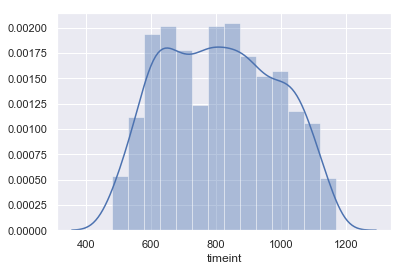

In [179]:
ax=sns.distplot(fbooking2.loc[fbooking2['timeint'].notnull(),'timeint'])

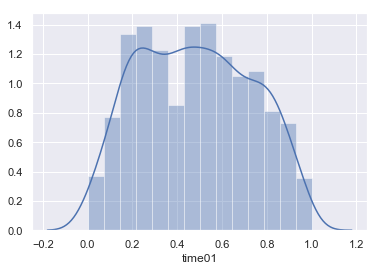

In [147]:
ax=sns.distplot(fbooking2.loc[fbooking2['time01'].notnull(),'time01'])

In [148]:
fbooking2.dtypes

client                      object
staff                     category
service                     object
date                        object
time                        object
timeint                    float64
description                 object
category                  category
noshowflag                 float64
canceldate                  object
canceledby                  object
latecancellation             int64
dayinweek                 category
tdate               datetime64[ns]
month                        int64
time01                     float64
ttime               datetime64[ns]
hour                      category
dtype: object

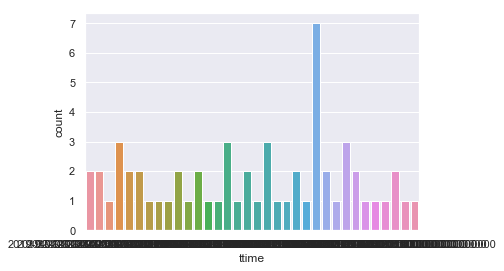

In [149]:
ax = sns.countplot(x="ttime",data=fbooking2[fbooking2.noshowflag==1])

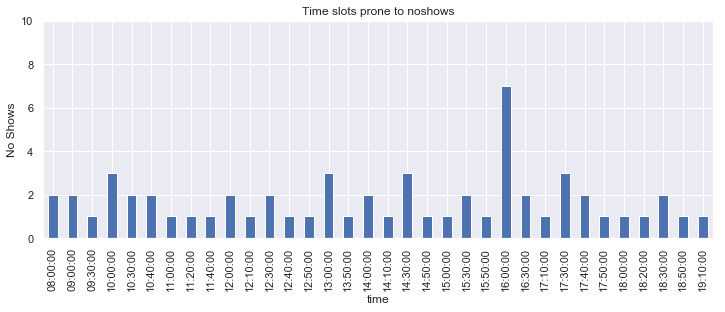

In [150]:
df2 = fbooking2[(fbooking2.noshowflag==1)].copy()
slot=df2.groupby('time').count() 
slot=slot['noshowflag']

plt.figure(figsize=(12,4))
plt.title("Time slots prone to noshows")
plt.ylabel("No Shows")
plt.ylim(0,10)
slot.plot.bar()

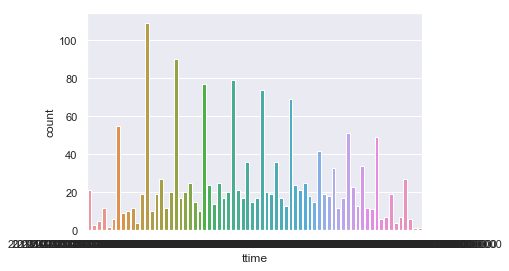

In [151]:
ax = sns.countplot(x="ttime",data=fbooking2[fbooking2.noshowflag==0])

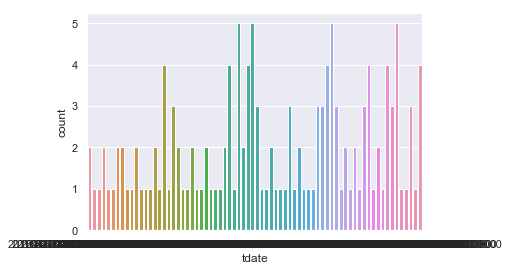

In [152]:
ax = sns.countplot(x="tdate",data=fbooking2[fbooking2.noshowflag==1])
#serie2s=pd.Series(index=)
#series.hist()
#pyplot.show()

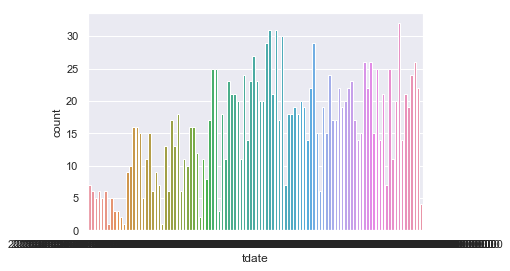

In [222]:
ax = sns.countplot(x="tdate",data=fbooking2[fbooking2.noshowflag==0])

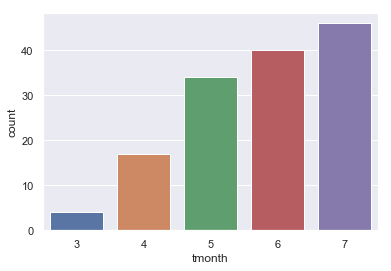

In [230]:
ax = sns.countplot(x="tmonth",data=fbooking2[fbooking2.noshowflag==1])

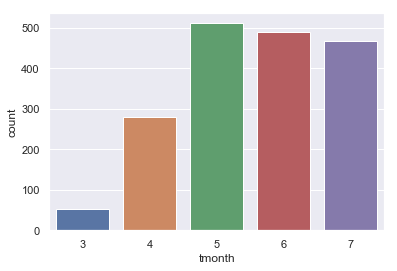

In [231]:
ax = sns.countplot(x="tmonth",data=fbooking2)

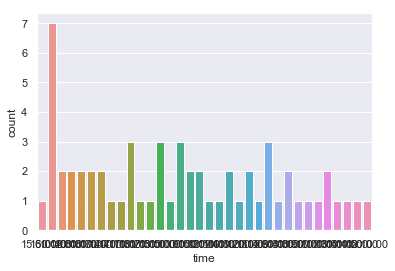

In [236]:
ax = sns.countplot(x="time",data=fbooking2[fbooking2.noshowflag==1])

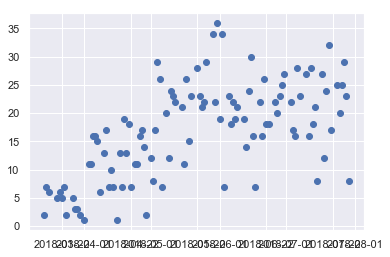

In [201]:
xs = matplotlib.dates.date2num(fbooking2.tdate.unique())
fbooking2.tdate.value_counts().sort_index()
plt.plot_date(xs,fbooking2.tdate.value_counts().sort_index())
plt.show()

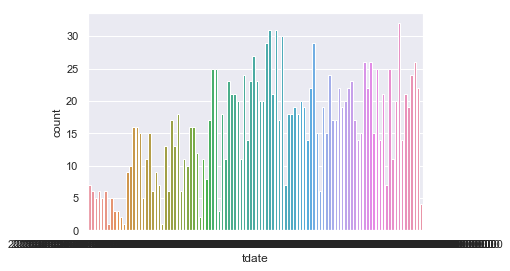

In [194]:
ax = sns.countplot(x="tdate",data=fbooking2[fbooking.noshowflag==0])

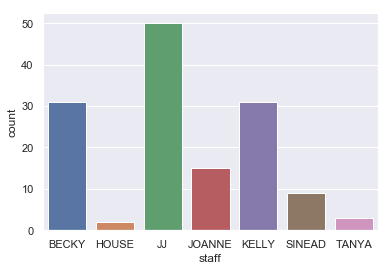

In [138]:
ax = sns.countplot(x="staff",data=fbooking2[fbooking.noshowflag==1])

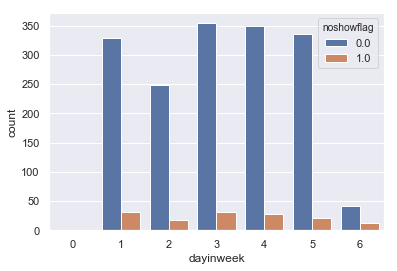

In [177]:
ax = sns.countplot(x="dayinweek",hue="noshowflag",data=fbooking2)

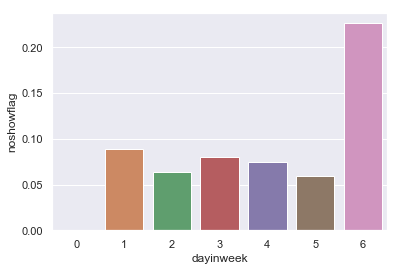

In [183]:
ax = sns.barplot(x="dayinweek",y="noshowflag",data=fbooking2,ci=None)

In [58]:
#there are customers with more than one  appointment on the same day
query="""select count(*),code,date from vfb 
where vfb.date <= '2018-07-29'
group by code,date having count(*) >=2"""
resquery=readSQL(query)
resquery.head()

,count(*),code,date
0,2,.L01,2018-05-23
1,2,ADAP01,2018-06-28
2,3,ALCV01,2018-06-12
3,4,ANDJ01,2018-05-22
4,2,ARRM01,2018-06-08


<h3>create merged dataframe bookings and services receipts <h3>

In [14]:
receipts=readSQL("""select * from vreceipt""")
bookings=readSQL("""select * from vbooking""")
noshows=readSQL("""select * from noshow""")
len(bookings)

2149

In [5]:
receipts.columns

Index(['receipt', 'date', 'description', 'client', 'staff', 'quantity',
       'amount', 'gst', 'pst', 'service', 'type', 'category'],
      dtype='object')

In [6]:
bookings.columns

Index(['client', 'staff', 'service', 'date', 'time', 'canceldate',
       'description', 'category', 'noshowflag', 'cancelflag'],
      dtype='object')

In [18]:
receipts2=receipts.copy()
receipts2.groupby(['date','description','client','staff','service','category']).


AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [15]:
result = pd.merge(bookings,receipts[['receipt', 'date', 'description', 'client', 'staff', 
                                     'quantity','amount', 'service', 'type', 'category']]
                  ,on= ['date','description','client','staff','service','category']
                  ,how='left',indicator=True)
len(result)

2151

In [13]:
result.head()

,client,staff,service,date,time,canceldate,description,category,noshowflag,cancelflag,receipt,quantity,amount,type,_merge
0,JUNJ01,JJ,CON,2018-03-14,15:50:00,None,Consultation,MISC,1,0,NaN,NaN,NaN,NaN,left_only
1,NORJ01,JJ,SHCM,2018-03-14,16:00:00,None,Men's hair cut,STYLE,1,0,NaN,NaN,NaN,NaN,left_only
2,CORS01,JJ,SHCW,2018-03-15,14:10:00,None,Women's hair cut,STYLE,0,0,8.0,1.0,82.0,S,both
3,KERT01,JJ,SHCW,2018-03-15,10:00:00,None,Women's hair cut,STYLE,0,0,10.0,1.0,82.0,S,both
4,LEHJ01,JJ,SHCM,2018-03-15,18:00:00,None,Men's hair cut,STYLE,0,0,13.0,1.0,40.0,S,both


In [16]:
result.to_sql('result',db,if_exists='replace',index=False)

In [12]:
bookings.dtypes

client         object
staff          object
service        object
date           object
time           object
canceldate     object
description    object
category       object
noshowflag      int64
cancelflag      int64
dtype: object